In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from IPython.display import HTML
from tqdm import tqdm_notebook 
import seaborn as sns
import imageio

import os

In [ ]:
data, labels = make_blobs(n_samples=1000,     # total samples
                          centers=4,          # how many clusters
                          n_features=2,       # x and y only
                          random_state=0)     # same output repeatable

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

In [ ]:
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='coolwarm')
plt.title("cluater")
plt.show()

In [ ]:
labels_original = labels
labels = np.mod(labels_original, 2)

In [ ]:
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='coolwarm')
plt.title("Converted Labels (2 groups)")
plt.show()

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(data,
                                                  labels,
                                                  stratify=labels,
                                                  random_state=0)

print(" shape", X_train.shape, Y_train.shape)
print("valid", X_val.shape, Y_val.shape)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.metrics import mean_squared_error

class FFNetworkW1:
    
    def __init__(self):
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.w3 = np.random.randn()
        self.w4 = np.random.randn()
        self.w5 = np.random.randn()
        self.w6 = np.random.randn()
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0
    
    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def forward_pass(self, x):
        self.x1, self.x2 = x
        self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
        self.h1 = self.sigmoid(self.a1)
        self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
        self.h2 = self.sigmoid(self.a2)
        self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
        self.h3 = self.sigmoid(self.a3)
        return self.h3
    
    def grad(self, x, y):
        self.forward_pass(x)
        self.dw1 = (self.h3 - y) * self.h3*(1 - self.h3) * self.w5 * self.h1*(1 - self.h1) * self.x1
    
    def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False):
        if display_loss:
            loss_history = {}
            w1_history = {}
        for i in tqdm(range(epochs), total=epochs, unit="epoch"):
            dw1 = 0
            for x, y in zip(X, Y):
                self.grad(x, y)
                dw1 += self.dw1
            m = X.shape[0]
            self.w1 -= learning_rate * dw1 / m
            if display_loss:
                w1_history[i] = self.w1
                Y_pred = self.predict(X)
                loss_history[i] = mean_squared_error(Y_pred, Y)
        if display_loss:
            plt.figure(figsize=(10,4))
            plt.subplot(1,2,1)
            plt.plot(w1_history.values())
            plt.xlabel("Epochs"); plt.ylabel("W1 value"); plt.title("W1 over epochs")
            plt.subplot(1,2,2)
            plt.plot(loss_history.values())
            plt.xlabel("Epochs"); plt.ylabel("MSE"); plt.title("Loss curve")
            plt.show()
    
    def predict(self, X):
        return np.array([self.forward_pass(x) for x in X])
    

# Excersie


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [3]:
data, labels = make_blobs(n_samples=300, centers=3, n_features=2, cluster_std=1.2)


input_size = 2
hidden_size = 3
output_size = 3


W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))


lr = 0.1

In [5]:
def softmax(x):
	x = x - np.max(x, axis=1, keepdims=True)
	exp_x = np.exp(x)
	return exp_x / np.sum(exp_x, axis=1, keepdims=True)


def one_hot(y, c):
	res = np.zeros((y.shape[0], c))
	res[np.arange(y.shape[0]), y] = 1
	return res


def forward_pass(x):
	z1 = np.dot(x, W1) + b1
	a1 = np.tanh(z1)
	z2 = np.dot(a1, W2) + b2
	a2 = softmax(z2)
	return z1, a1, z2, a2


def loss_fn(y_true, y_pred):
	eps = 1e-9
	return -np.mean(np.sum(y_true * np.log(y_pred + eps), axis=1))

In [21]:
y_oh = one_hot(labels, output_size)
epochs = 300
losses = []

frames_dir = 'frames_png'
os.makedirs(frames_dir, exist_ok=True)

for e in range(1, epochs+1):
    z1, a1, z2, a2 = forward_pass(data)
    loss = loss_fn(y_oh, a2)
    losses.append(loss)

    dz2 = (a2 - y_oh) / data.shape[0]
    dW2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)
    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * (1 - np.tanh(z1) ** 2)
    dW1 = np.dot(data.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

    if e % 50 == 0 or e == 1:
        xx, yy = np.meshgrid(
            np.linspace(data[:,0].min()-1, data[:,0].max()+1, 200),
            np.linspace(data[:,1].min()-1, data[:,1].max()+1, 200)
        )
        grid = np.c_[xx.ravel(), yy.ravel()]
        _, h_act, _, preds = forward_pass(grid)
        pred_classes = np.argmax(preds, axis=1)
        
        plt.figure(figsize=(6,5))
        plt.contourf(xx, yy, pred_classes.reshape(xx.shape), alpha=0.3)
        plt.scatter(data[:,0], data[:,1], c=labels)
        plt.title("epoch " + str(e))
        plt.savefig(os.path.join(frames_dir, "epoch" + str(e) + ".png"))
        plt.close()
        print("Saved epoch", e, "PNG in folder", frames_dir)


Saved epoch 1 PNG in folder frames_png
Saved epoch 50 PNG in folder frames_png
Saved epoch 100 PNG in folder frames_png
Saved epoch 150 PNG in folder frames_png
Saved epoch 200 PNG in folder frames_png
Saved epoch 250 PNG in folder frames_png
Saved epoch 300 PNG in folder frames_png


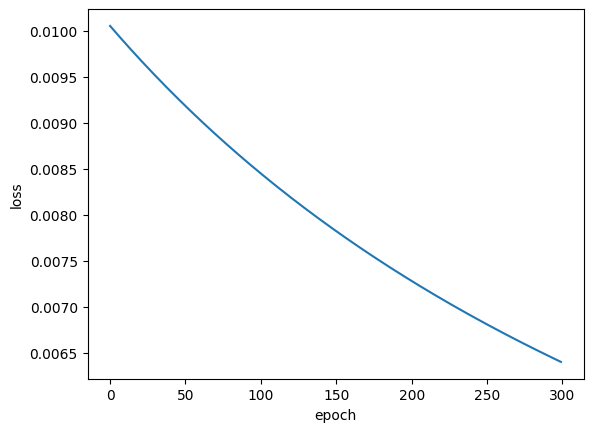

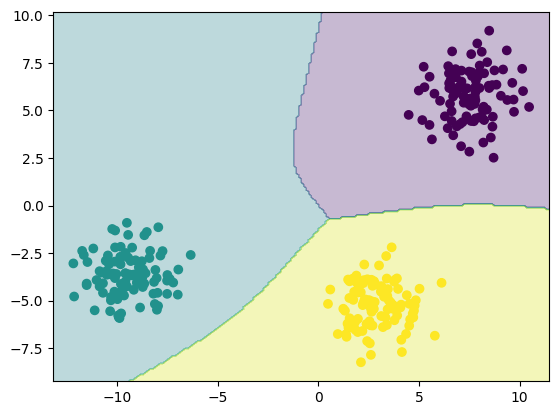

In [22]:
plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()


x_min, x_max = data[:,0].min()-1, data[:,0].max()+1
y_min, y_max = data[:,1].min()-1, data[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
_, h_act, _, preds = forward_pass(grid)
pred_classes = np.argmax(preds, axis=1)


plt.contourf(xx, yy, pred_classes.reshape(xx.shape), alpha=0.3)
plt.scatter(data[:,0], data[:,1], c=labels)
plt.show()

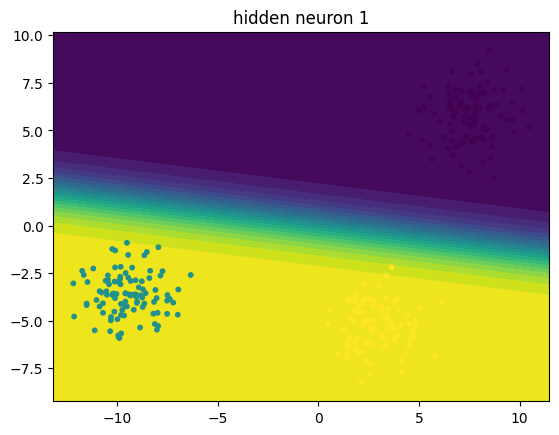

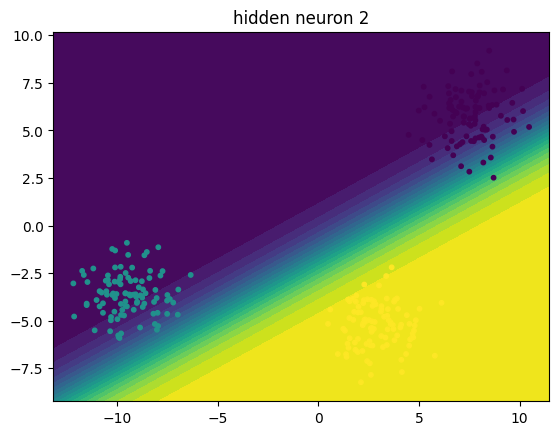

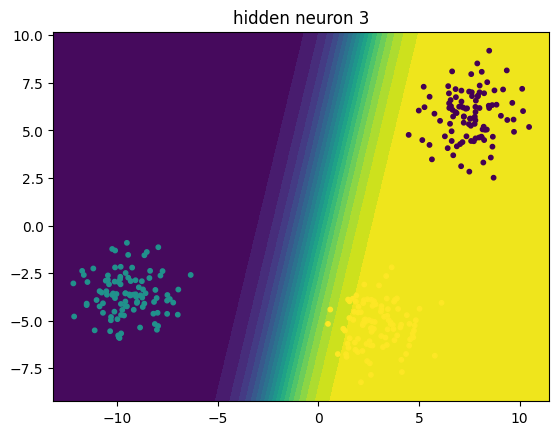

In [23]:
for i in range(hidden_size):
	plt.contourf(xx, yy, h_act[:,i].reshape(xx.shape), levels=20)
	plt.scatter(data[:,0], data[:,1], c=labels, s=10)
	plt.title("hidden neuron " + str(i+1))
	plt.show()

In [ ]:
if e % 100 == 0:
    xx, yy = np.meshgrid(np.linspace(data[:,0].min()-1, data[:,0].max()+1, 200),
                         np.linspace(data[:,1].min()-1, data[:,1].max()+1, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    _, h_act, _, preds = forward_pass(grid)
    pred_classes = np.argmax(preds, axis=1)

    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, pred_classes.reshape(xx.shape), alpha=0.3)
    plt.scatter(data[:,0], data[:,1], c=labels)
    plt.title("epoch " + str(e))
    plt.savefig("epoch" + str(e) + ".png")   
    plt.close()


In [13]:
import os
print([f for f in os.listdir() if f.startswith("epoch") and f.endswith(".png")])


[]


In [ ]:
from PIL import Image
import glob

frames_dir = 'frames_png'
frames = []
for f in sorted(glob.glob(frames_dir + "/epoch*.png")):
    img = Image.open(f)
    frames.append(img)


frames[0].save("training.gif", save_all=True, append_images=frames[1:], duration=500, loop=0)
print("saved")


saved training.gif
